In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"D:\Phishing Domains Detection\Data\PhiUSIIL_Phishing_URL_Dataset.csv")

In [3]:
data = data.drop(['FILENAME','Title','URL','Domain','URLSimilarityIndex'],axis=1)

In [4]:
print(data.dtypes)

URLLength                       int64
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineLength               int64
HasTitle                        int64
DomainTitleMatchScore         float64
URLTitleMatc

In [ ]:
X = data.drop(['label'],axis=1)
y = data['label']

scaler = MinMaxScaler()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = X_train.columns

all_tlds = pd.concat([X_train['TLD'], X_test['TLD']])
le = LabelEncoder()
le.fit(all_tlds)

# Transform TLD columns
X_train['tld_encoded'] = le.transform(X_train['TLD'])
X_test['tld_encoded'] = le.transform(X_test['TLD'])
# Drop the original 'tld' column before scaling
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['TLD']))
X_test_scaled = scaler.transform(X_test.drop(columns=['TLD']))

model = SGDClassifier(
    loss='hinge', 
    penalty='l2', 
    max_iter=1000, 
    alpha=0.0001, 
    random_state=42, 
    learning_rate='optimal' 
)

model.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test_scaled)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9969465001378316
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



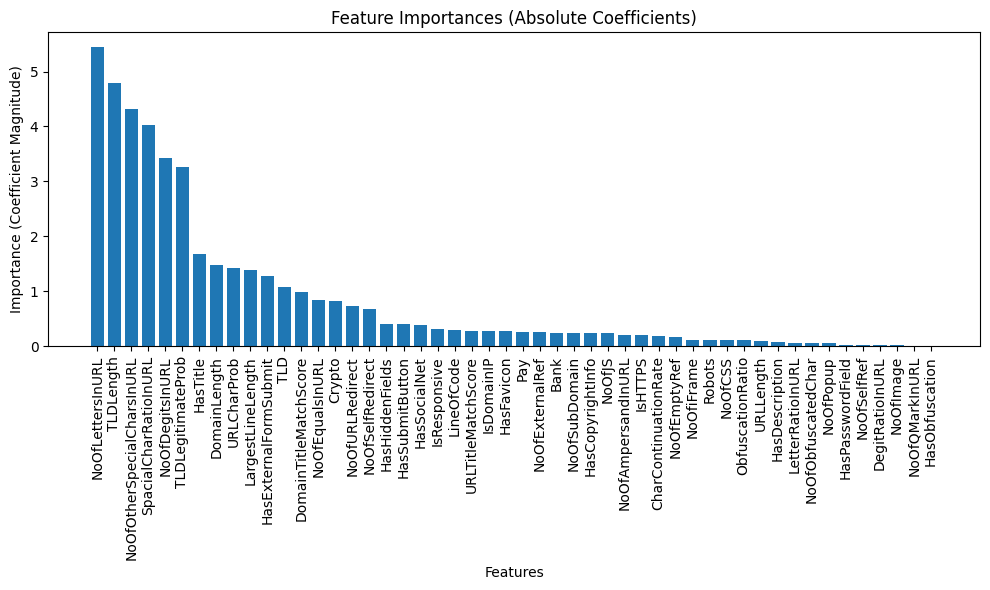

In [12]:
coefficients = model.coef_[0]
indices = np.argsort(np.abs(coefficients))[::-1]
features = feature_names

plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Absolute Coefficients)')
plt.bar(range(len(features)), np.abs(coefficients[indices]), align='center')
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance (Coefficient Magnitude)")
plt.tight_layout()
plt.show()

In [13]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Cross-Validation Scores: [0.9976145  0.99708432 0.99636865 0.99716383 0.99732287]
Mean Accuracy: 0.9971108351339687


In [12]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [13]:
import joblib
joblib.dump(model, 'SGD_model.joblib')

['SGD_model.joblib']

In [14]:
print("Number of features:", model.n_features_in_)
print("Shape of coef_:", model.coef_.shape)
print("Shape of intercept_:", model.intercept_.shape)


Number of features: 49
Shape of coef_: (1, 49)
Shape of intercept_: (1,)


In [15]:
print(model.get_params())
print("Classes:", model.classes_)


{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Classes: [0 1]


----------------------------------------------------------------------------------------------------------------------------------------------------------------
'Test'


In [29]:
from extract import Scrape

url = "https://www.site24x7.com/tools/find-ip-address-of-web-site.html"
fetch = Scrape(url)

features = {
    'URLLength': fetch.url_length(),
    'DomainLength': fetch.domain_length(),
    'IsDomainIP': fetch.isDomainip(),
    'TLD': fetch.get_tld(),
    'CharContinuationRate': fetch.char_continuation_rate(),
    'TLDLegitimateProb': fetch.get_tld_legitimate_prob(),
    'URLCharProb': fetch.calculate_url_char_prob(), 
    'TLDLength': fetch.tld_len(),
    'NoOfSubDomain': fetch.no_of_subdomains(),
    'HasObfuscation': fetch.has_obfuscation(),
    'NoOfObfuscatedChar': fetch.no_of_obfuscated_char(),
    'ObfuscationRatio': fetch.obfuscation_ratio(),
    'NoOfLettersInURL': fetch.no_of_letters(),
    'LetterRatioInURL': fetch.letter_count_in_ratio(),
    'NoOfDegitsInURL': fetch.digit_count(),
    'DegitRatioInURL': fetch.digit_ratio_in_url(),
    'NoOfEqualsInURL': fetch.no_of_equals(),
    'NoOfQMarkInURL': fetch.no_of_qmark(),
    'NoOfAmpersandInURL': fetch.no_of_ampersand(),
    'NoOfOtherSpecialCharsInURL': fetch.no_of_special_char(),
    'SpacialCharRatioInURL': fetch.special_char_ratio(),
    'IsHTTPS': fetch.is_https(),
    'LineOfCode': fetch.line_of_code(),
    'LargestLineLength': fetch.largest_line_length(),
    'HasTitle': fetch.has_title(),
    'DomainTitleMatchScore': fetch.domain_title_match_score(),
    'URLTitleMatchScore': fetch.get_url_title_match_score(),
    'HasFavicon': fetch.has_favicon(),
    'Robots': fetch.check_robots_txt(),  
    'IsResponsive': fetch.is_responsive(),
    'NoOfURLRedirect': fetch.no_of_redirects(),
    'NoOfSelfRedirect': fetch.no_of_self_redirect(),
    'HasDescription': fetch.has_description(),
    'NoOfPopup': fetch.no_of_popup(),
    'NoOfiFrame': fetch.no_of_iframe(),
    'HasExternalFormSubmit': fetch.has_external_form_submit(),
    'HasSocialNet': fetch.has_social(),
    'HasSubmitButton': fetch.has_submit_button(),
    'HasHiddenFields': fetch.has_hidden_fields(),
    'HasPasswordField': fetch.has_password_field(),
    'Bank': fetch.bank(),
    'Pay': fetch.check_payment_indicators(),
    'Crypto': fetch.crypto(),
    'HasCopyrightInfo': fetch.has_copyright_info(),
    'NoOfImage': fetch.no_of_image(),
    'NoOfCSS': fetch.no_of_css(),
    'NoOfJS': fetch.no_of_js(),
    'NoOfSelfRef': fetch.no_of_self_ref(),
    'NoOfEmptyRef': fetch.no_of_empty_ref(),
    'NoOfExternalRef': fetch.no_of_external_ref()
}

data = features
print(data)

Processing...!!!!
{'URLLength': 63, 'DomainLength': 16, 'IsDomainIP': 0, 'TLD': 'com', 'CharContinuationRate': 2.755813953488372, 'TLDLegitimateProb': 0.95, 'URLCharProb': 0.9026455026455026, 'TLDLength': 3, 'NoOfSubDomain': 1, 'HasObfuscation': 1, 'NoOfObfuscatedChar': 0, 'ObfuscationRatio': 0.0, 'NoOfLettersInURL': 47, 'LetterRatioInURL': 0.746031746031746, 'NoOfDegitsInURL': 3, 'DegitRatioInURL': 0.047619047619047616, 'NoOfEqualsInURL': 0, 'NoOfQMarkInURL': 0, 'NoOfAmpersandInURL': 0, 'NoOfOtherSpecialCharsInURL': 2, 'SpacialCharRatioInURL': 0.125, 'IsHTTPS': 1, 'LineOfCode': 1689, 'LargestLineLength': 14185, 'HasTitle': 1, 'DomainTitleMatchScore': 0.24324324324324326, 'URLTitleMatchScore': 0.25396825396825395, 'HasFavicon': 1, 'Robots': 0, 'IsResponsive': 1, 'NoOfURLRedirect': 2, 'NoOfSelfRedirect': 0, 'HasDescription': 1, 'NoOfPopup': 7, 'NoOfiFrame': 1, 'HasExternalFormSubmit': 1, 'HasSocialNet': 1, 'HasSubmitButton': 1, 'HasHiddenFields': 1, 'HasPasswordField': 0, 'Bank': 1, 'Pa

In [30]:
input_df = pd.DataFrame([data])

encoded_TLD = le.transform(input_df['TLD'])
input_df['tld_encoded'] = encoded_TLD
scaled_input = scaler.transform(input_df.drop(columns=['TLD']))

In [31]:
joblib.dump(scaler, 'scaler.pkl')

NameError: name 'joblib' is not defined

In [32]:
expected_features = ['URLLength','DomainLength','IsDomainIP','CharContinuationRate','TLDLegitimateProb','URLCharProb','TLDLength','NoOfSubDomain',                   
                'HasObfuscation','NoOfObfuscatedChar','ObfuscationRatio','NoOfLettersInURL','LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',               
                'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL','NoOfOtherSpecialCharsInURL','SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode',
                'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon','Robots',                          
                'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect','HasDescription', 'NoOfPopup', 'NoOfiFrame', 
                'HasExternalFormSubmit','HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',                          
                'HasCopyrightInfo','NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef','tld_enncoded']
for feature in expected_features:
    if feature not in features:
        features[feature] = 0  


In [33]:
features_df = pd.DataFrame([features])[expected_features]
prediction = model.predict(features_df)

print(prediction)

[0]


c:\Users\vishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


c:\Users\vishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


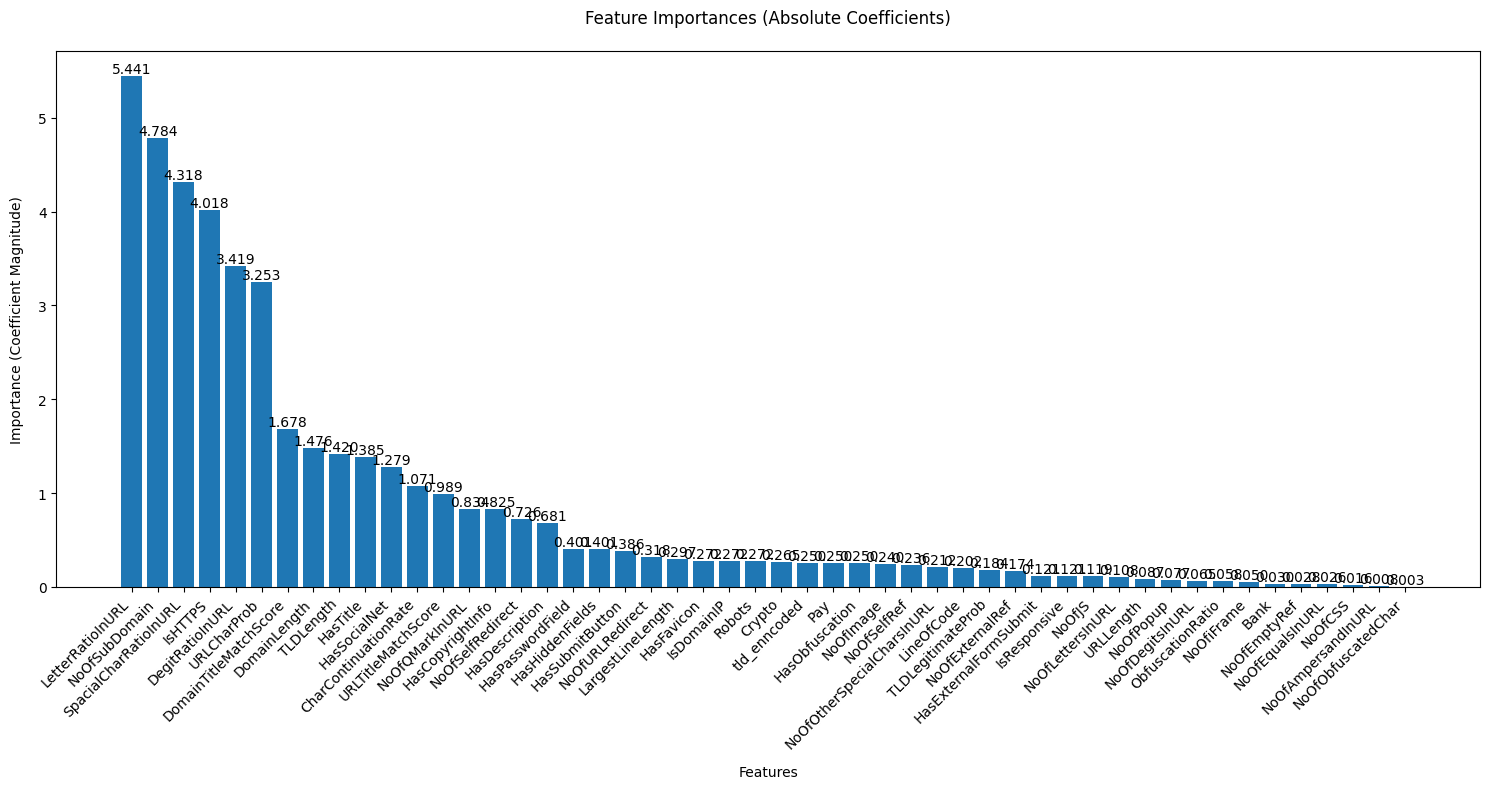


Top 10 Most Important Features:
LetterRatioInURL: -5.441
NoOfSubDomain: 4.784
SpacialCharRatioInURL: -4.318
IsHTTPS: 4.018
DegitRatioInURL: -3.419
URLCharProb: 3.253
DomainTitleMatchScore: 1.678
DomainLength: 1.476
TLDLength: -1.420
HasTitle: 1.385

Prediction: [0]


In [34]:
features_df = pd.DataFrame([features])[expected_features]
prediction = model.predict(features_df)

coefficients = model.coef_[0]
feature_names = np.array(expected_features)
indices = np.argsort(np.abs(coefficients))[::-1]

plt.figure(figsize=(15, 8))
plt.title('Feature Importances (Absolute Coefficients)', pad=20)
plt.bar(range(len(feature_names)), np.abs(coefficients[indices]), align='center')
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=45, ha='right')
plt.xlabel("Features", labelpad=10)
plt.ylabel("Importance (Coefficient Magnitude)", labelpad=10)

for i, v in enumerate(np.abs(coefficients[indices])):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
for idx in indices[:10]:
    print(f"{feature_names[idx]}: {coefficients[idx]:.3f}")

print("\nPrediction:", prediction)